In [129]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random

In [130]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    plt.scatter(X, y)
    plt.xlabel('number of rooms')
    plt.ylabel('prices')
def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0,ending=4):     #G
    x = np.linspace(0, 8, 1000)
    plt.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

In [131]:
import pandas as pd
features = pd.Series([1,2,3,5,6,7])
labels = pd.Series([155, 197, 244, 356,407,448])
pd.concat([features, labels], axis=1)

,0,1
0,1,155
1,2,197
2,3,244
3,5,356
4,6,407
5,7,448


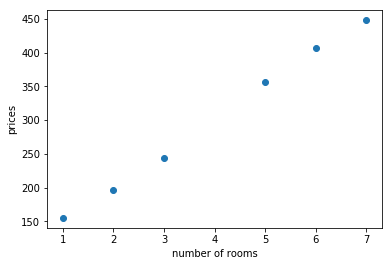

In [132]:
plot_points(features, labels)

In [133]:
def simple_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += learning_rate
        base_price += learning_rate
    if price > predicted_price and num_rooms < 0:
        price_per_room -= learning_rate
        base_price += learning_rate
    if price < predicted_price and num_rooms > 0:
        price_per_room -= learning_rate
        base_price -= learning_rate
    if price < predicted_price and num_rooms < 0:
        price_per_room -= learning_rate
        base_price += learning_rate
    return price_per_room, base_price

In [134]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price:
        price_per_room += learning_rate*num_rooms
        base_price += learning_rate
    else:
        price_per_room -= learning_rate*num_rooms
        base_price -= learning_rate
    return price_per_room, base_price

In [135]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price

('Price per room:', 51.07296115119787)
('Base price:', 99.47510567502614)


(51.07296115119787, 99.47510567502614)

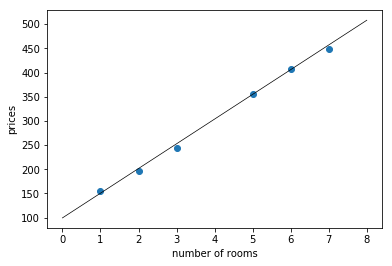

In [166]:
import random as rd
random.seed(0)
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    for i in range(epochs):
        # Uncomment any of the following lines to plot 
        #if i == 1:
        #if i <= 10:
        #if i <= 50:
        #if i > 50:
        #if i > 50 and i % (epochs/20) == 0: # only printing 1000 lines
        #    draw_line(price_per_room, base_price)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
#        price_per_room, base_price = simple_trick(base_price,
#        price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    draw_line(price_per_room, base_price, 'black')
    plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price
linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)